In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('drive')

Mounted at drive


# Load data from a CSV file

In [ ]:
dataset_address = 'drive/MyDrive/1.csv'
dataset_address2 = 'drive/MyDrive/2.csv'
dataset_address3 = 'drive/MyDrive/3.csv'
df = pd.read_csv(dataset_address)
df2 = pd.read_csv(dataset_address2)
df3 = pd.read_csv(dataset_address3)
print(df)
print(df2)
print(df3)

               x           y  color
0      67.032380  131.777258      2
1     412.517529  156.706716      1
2     109.730290  364.408237      4
3     448.511829  343.291836      3
4     405.997147  128.725708      1
...          ...         ...    ...
2629  110.853954   86.829636      2
2630  467.022911  189.860573      1
2631  251.151830  246.659135      0
2632  455.347545  114.490492      1
2633  437.051241  361.356835      3

[2634 rows x 3 columns]
                x           y  color
0      400.806675  174.702750      6
1      401.154038   70.450386      0
2      294.722093   30.296820      4
3      415.366580   86.633522      0
4      181.464244   83.254630      1
...           ...         ...    ...
21595  113.964852  277.039448      5
21596  106.399480  309.584873      5
21597  297.364281  260.572759      7
21598  216.247407  268.939725      8
21599  180.328759   70.234050      1

[21600 rows x 3 columns]
                x           y  color
0      317.614913  197.197881      2

In [ ]:
#df['color'] = df['color'].map({0:'r',1:'b',2:'g',3:'y',4:'black'})
df

#k-means

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Function to initialize centroids randomly
def initialize_centroids(X, k):
    n_samples, n_features = X.shape
    centroids = np.zeros((k, n_features))
    for i in range(k):
        centroid = X[np.random.choice(range(n_samples))]
        centroids[i] = centroid
    return centroids

# Function to assign data points to the nearest centroid
def assign_clusters(X, centroids):
    n_samples = X.shape[0]
    clusters = np.zeros(n_samples)
    for i in range(n_samples):
        distances = np.zeros(k)
        for j in range(k):
            distances[j] = euclidean_distance(X[i], centroids[j])
        cluster = np.argmin(distances)
        clusters[i] = cluster
    return clusters

# Function to update centroids based on the mean of assigned data points
def update_centroids(X, clusters, k):
    n_features = X.shape[1]
    centroids = np.zeros((k, n_features))
    for i in range(k):
        cluster_points = X[clusters == i]
        centroids[i] = np.mean(cluster_points, axis=0)
    return centroids

# Function to perform k-means clustering
def kmeans(X, k, max_iterations):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iterations):
        clusters = assign_clusters(X, centroids)
        prev_centroids = centroids
        centroids = update_centroids(X, clusters, k)
        if np.all(prev_centroids == centroids):
            break
    return centroids, clusters

In [ ]:
def k_means_clustering(data, num_clusters):
    # Convert data to numpy array
    data = np.array(data)
    
    # Initialize centroids randomly
    centroids = data[random.sample(range(len(data)), num_clusters)]
    
    # Initialize cluster labels
    labels = np.zeros(len(data))
    
    # Iteratively update centroids and cluster labels
    for i in range(10):  # number of iterations
        # Update cluster labels
        for j in range(len(data)):
            distances = np.linalg.norm(data[j] - centroids, axis=1)
            labels[j] = np.argmin(distances)
        
        # Update centroids
        for k in range(num_clusters):
            centroids[k] = np.mean(data[labels == k], axis=0)
    
    # Return the predicted cluster labels
    return labels

# 1.csv

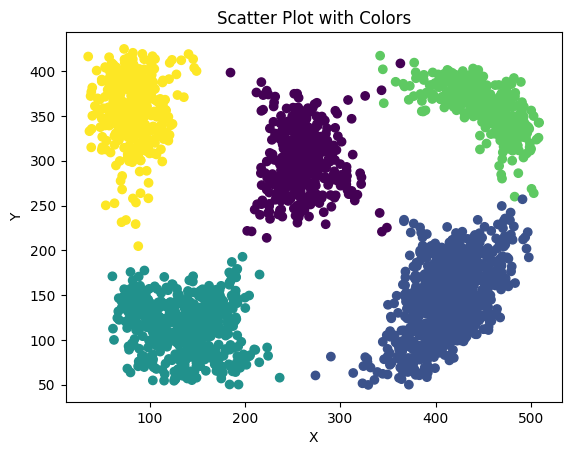

In [ ]:
data = df
# Extract x, y, and color columns from the data
x = data['x']
y = data['y']
colors = data['color']

#Plot the points with their colors
plt.scatter(x, y, c=colors)

# Set axis labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Colors')

# Show the plot
plt.show()

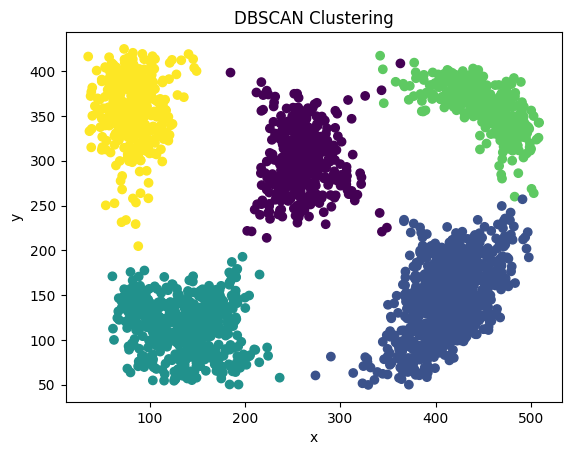

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['x', 'y']])

# Define DBSCAN parameters
eps = 0.3
min_samples = 3

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(df_scaled)

# Plot the points with different colors representing different clusters
plt.scatter(df['x'], df['y'], c=df['color'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('DBSCAN Clustering')
plt.show()

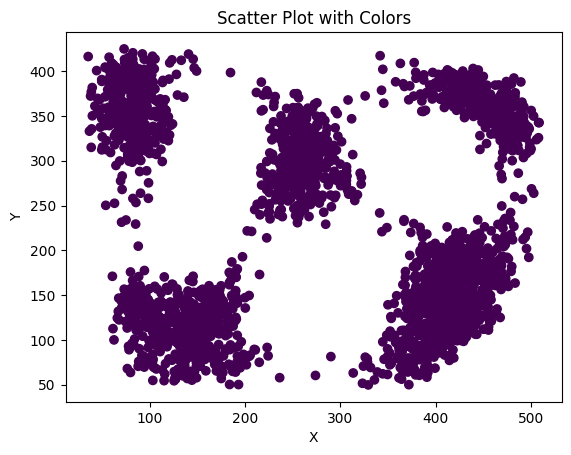

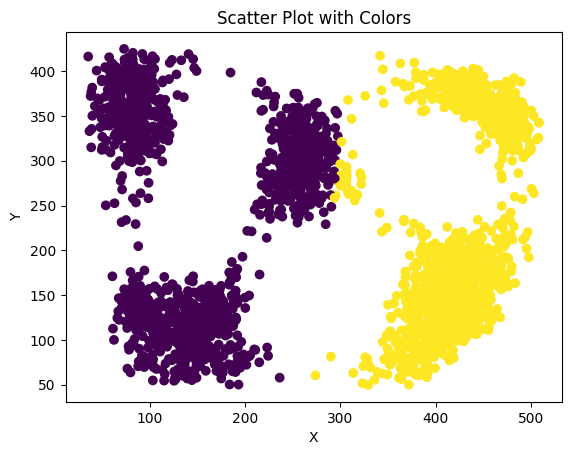

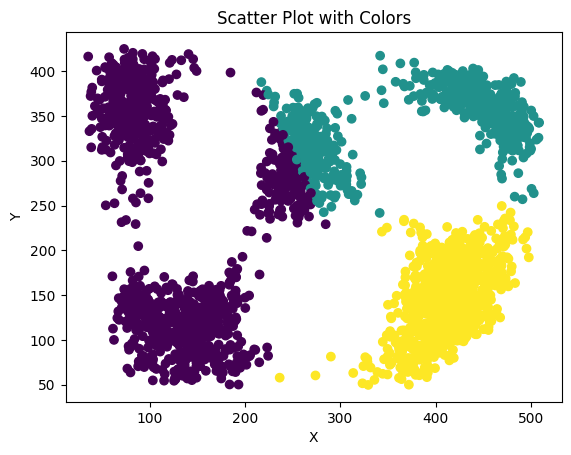

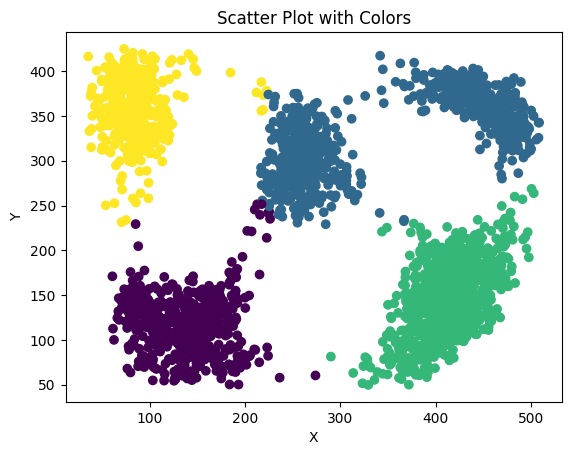

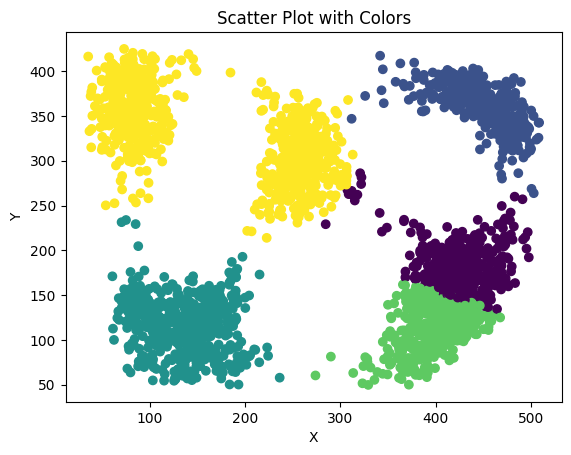

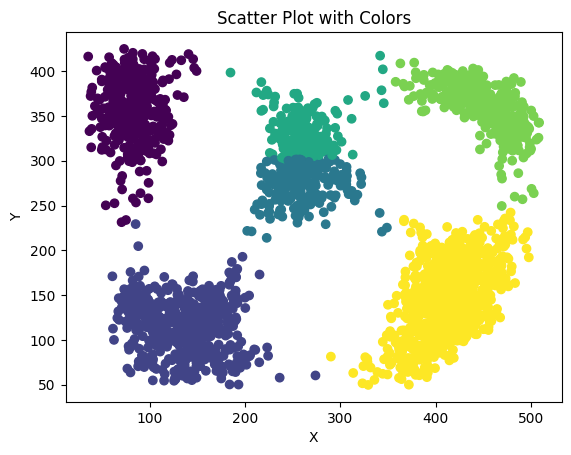

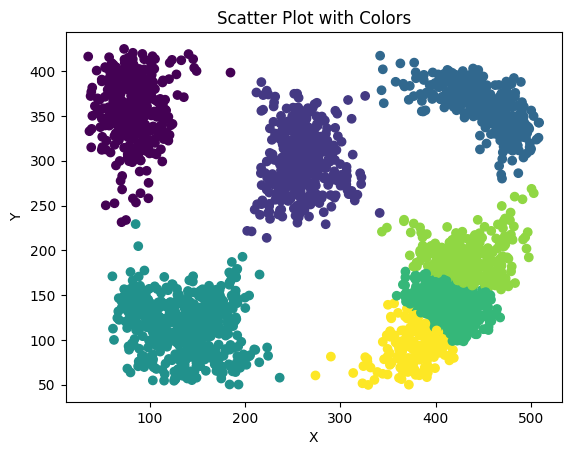

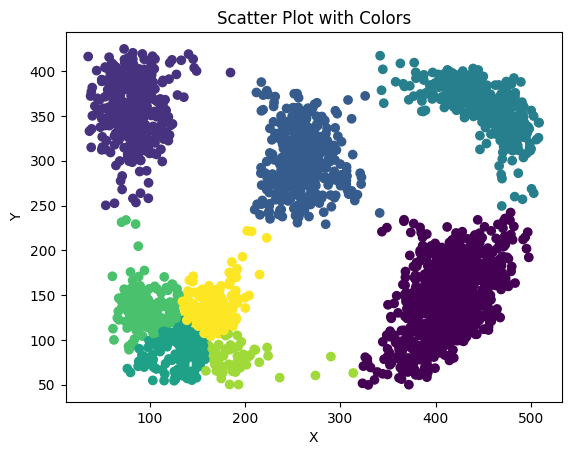

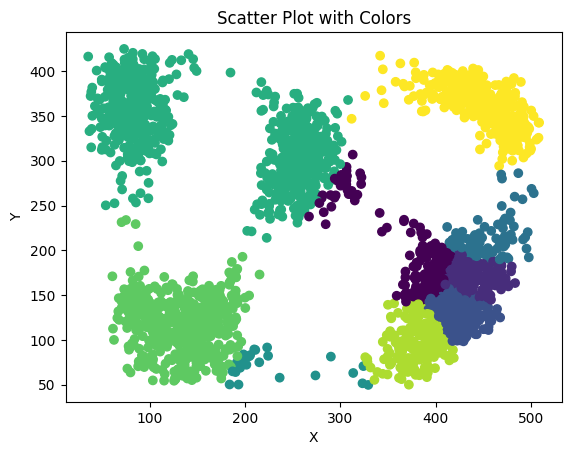

In [ ]:
for i in range(1,10):      
      labels=k_means_clustering(df,i)
     # labels
      # Load data from a CSV file
      data2 = df
      data2['color']=labels
      # Extract x, y, and color columns from the data
      x = data2['x']
      y = data2['y']
      colors = data2['color']

      #Plot the points with their colors
      plt.scatter(x, y, c=colors)
      # Set axis labels and title
      plt.xlabel('X')
      plt.ylabel('Y')
      plt.title('Scatter Plot with Colors')

      # Show the plot
      plt.show()

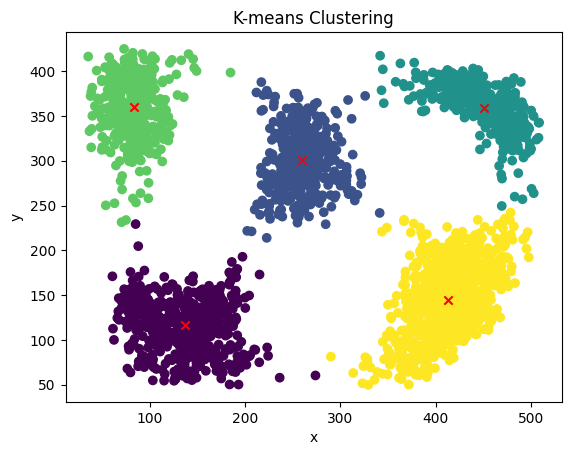

In [ ]:
# Create a sample dataset
data = np.array(df)

# Define the number of clusters (k) and maximum iterations
k = 5
max_iterations = 100

# Perform k-means clustering
centroids, clusters = kmeans(data, k, max_iterations)

# Plot the points and cluster centers
plt.scatter(data[:, 0], data[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('K-means Clustering')
plt.show()


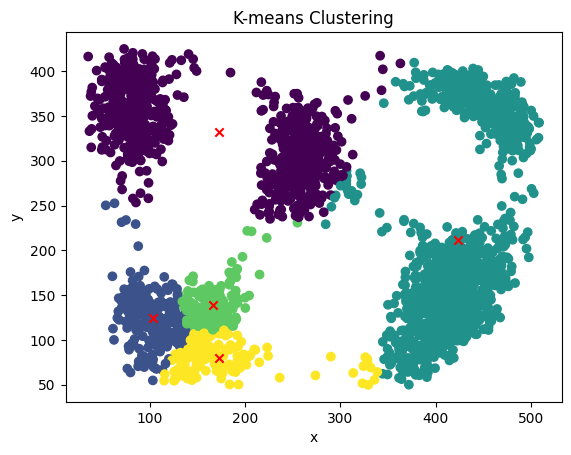

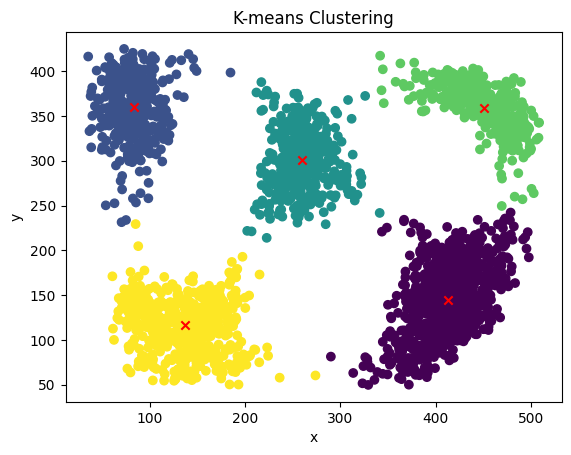

In [ ]:
# Create a sample dataset
data = np.array(df)

# Define the number of clusters (k) and maximum iterations
#k = 8
k=5
max_iterations = 100

# Perform k-means clustering
centroids, clusters = kmeans(data, k, max_iterations)

# Plot the points and cluster centers
plt.scatter(data[:, 0], data[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('K-means Clustering')
plt.show()

# Create a sample dataset
data = np.array(df)

# Perform k-means clustering
centroids, clusters = kmeans(data, k, max_iterations)

# Plot the points and cluster centers
plt.scatter(data[:, 0], data[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('K-means Clustering')
plt.show()


#2.csv

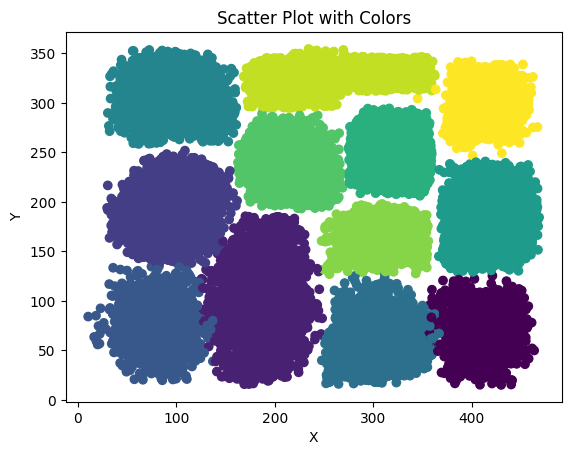

In [ ]:
data2 = df2
# Extract x, y, and color columns from the data
x = data2['x']
y = data2['y']
colors = data2['color']

#Plot the points with their colors
plt.scatter(x, y, c=colors)

# Set axis labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Colors')

# Show the plot
plt.show()

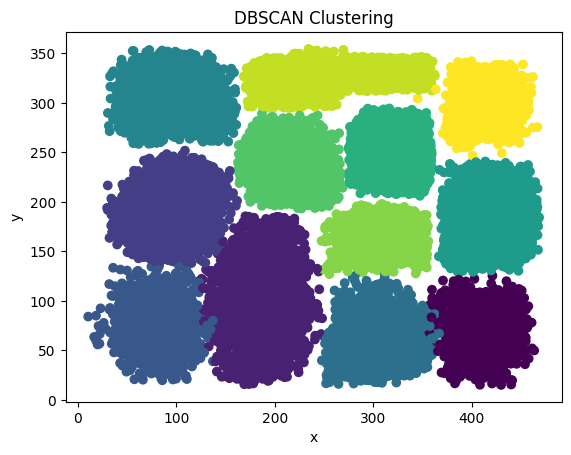

In [ ]:
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2[['x', 'y']])

# Define DBSCAN parameters
eps = 0.3
min_samples = 5

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(df_scaled)

# Plot the points with different colors representing different clusters
plt.scatter(df2['x'], df2['y'], c=df2['color'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('DBSCAN Clustering')
plt.show()

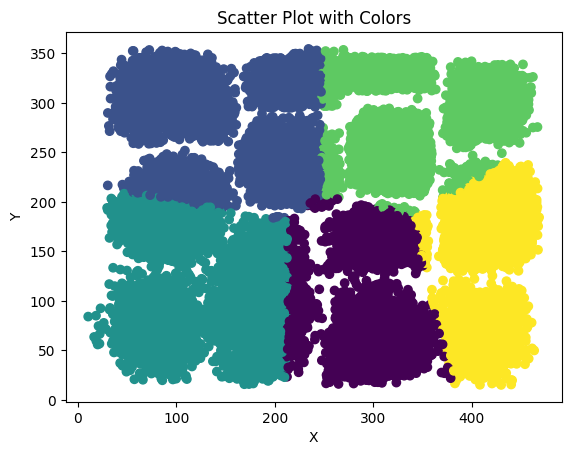

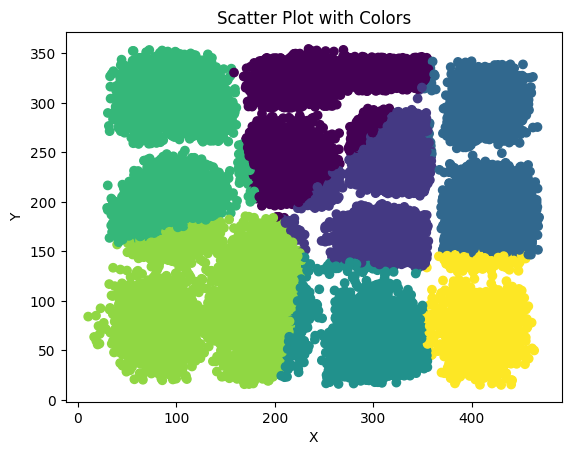

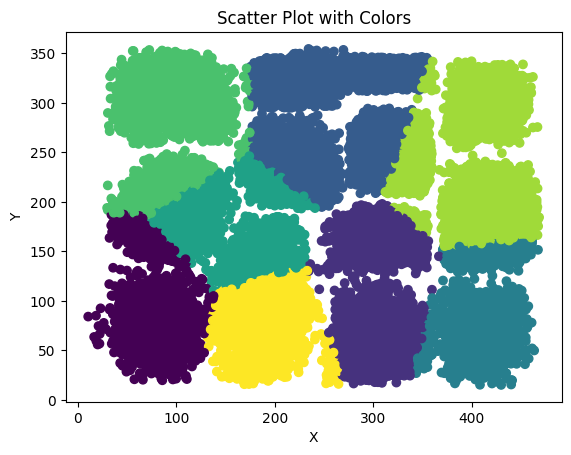

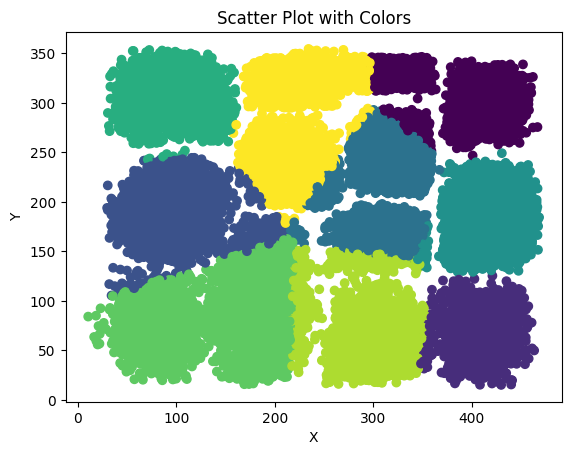

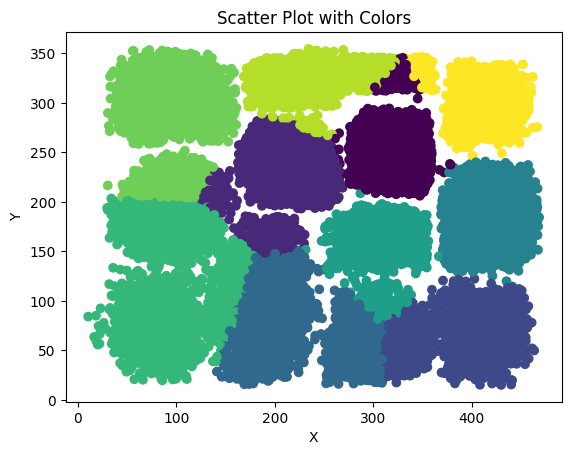

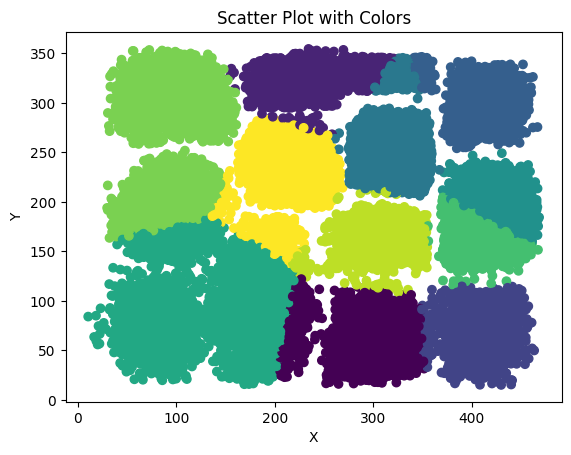

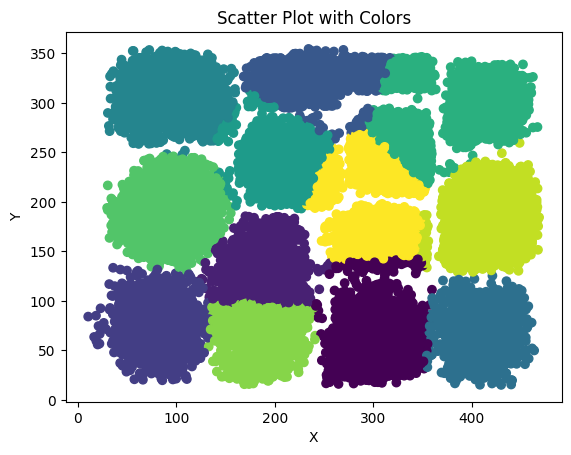

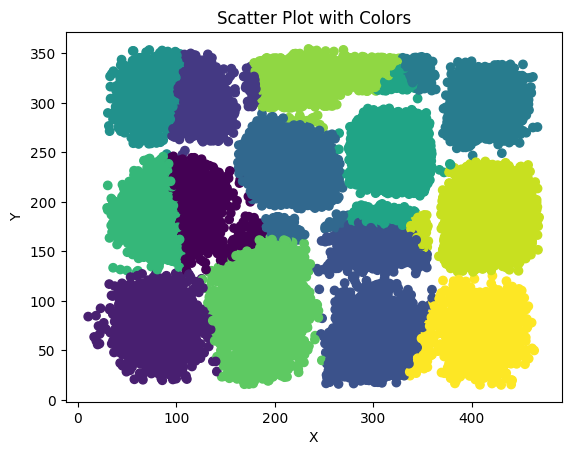

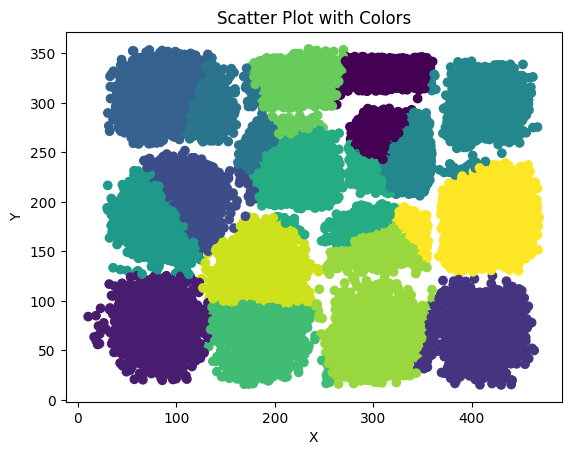

In [ ]:
for i in range(5,15):      
      labels=k_means_clustering(df2,i)
     # labels
      # Load data from a CSV file
      data2 = df2
      data2['color']=labels
      # Extract x, y, and color columns from the data
      x = data2['x']
      y = data2['y']
      colors = data2['color']

      #Plot the points with their colors
      plt.scatter(x, y, c=colors)
      # Set axis labels and title
      plt.xlabel('X')
      plt.ylabel('Y')
      plt.title('Scatter Plot with Colors')

      # Show the plot
      plt.show()

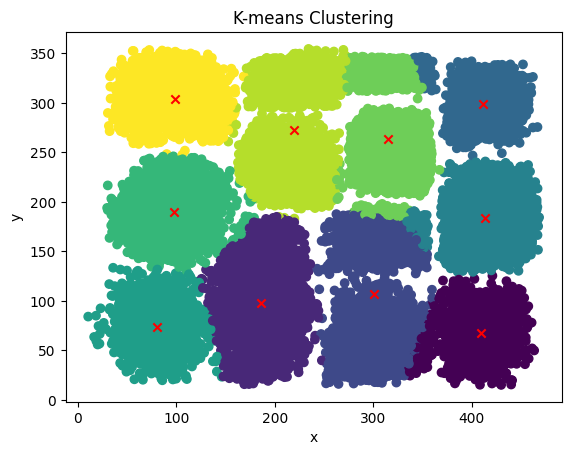

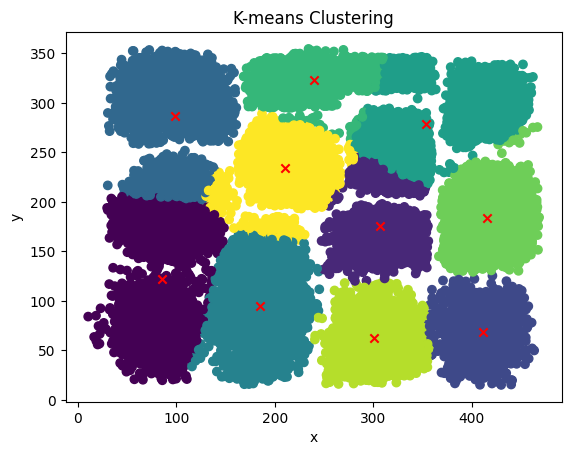

In [ ]:
# Create a sample dataset
data = np.array(df2)

# Define the number of clusters (k) and maximum iterations
k = 12
max_iterations = 100

# Perform k-means clustering
centroids, clusters = kmeans(data, k, max_iterations)

# Plot the points and cluster centers
plt.scatter(data[:, 0], data[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('K-means Clustering')
plt.show()


# Perform k-means clustering
centroids, clusters = kmeans(data, k, max_iterations)

# Plot the points and cluster centers
plt.scatter(data[:, 0], data[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('K-means Clustering')
plt.show()

# 3.csv

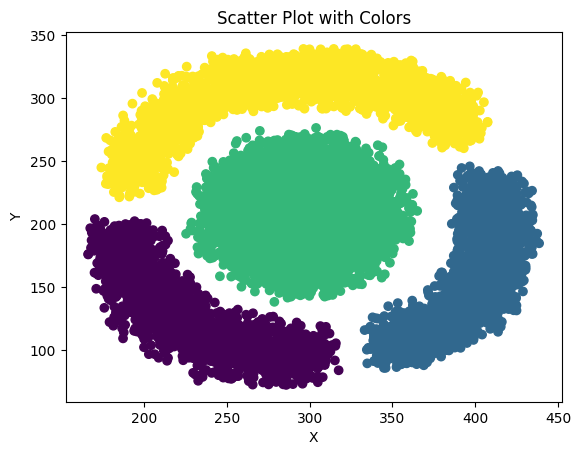

In [ ]:
data3 = df3
# Extract x, y, and color columns from the data
x = data3['x']
y = data3['y']
colors = data3['color']

#Plot the points with their colors
plt.scatter(x, y, c=colors)

# Set axis labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Colors')

# Show the plot
plt.show()

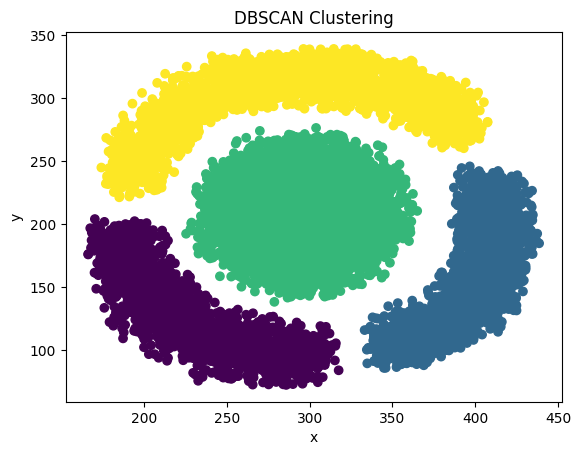

In [ ]:
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df3[['x', 'y']])

# Define DBSCAN parameters
eps = 0.5
min_samples = 5

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(df_scaled)

# Plot the points with different colors representing different clusters
plt.scatter(df3['x'], df3['y'], c=df3['color'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('DBSCAN Clustering')
plt.show()

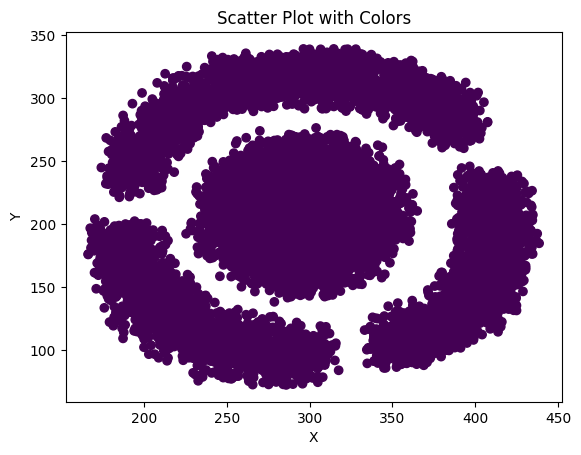

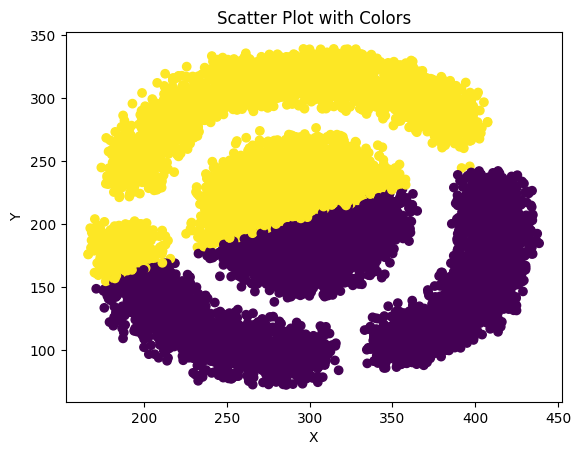

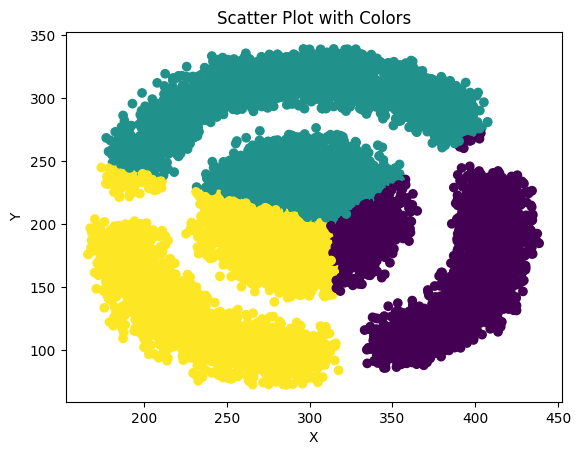

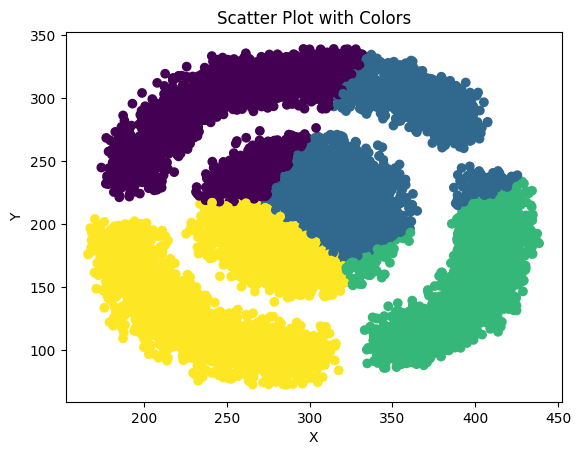

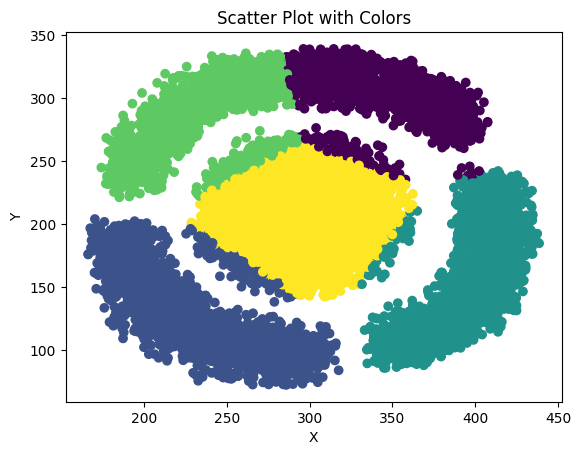

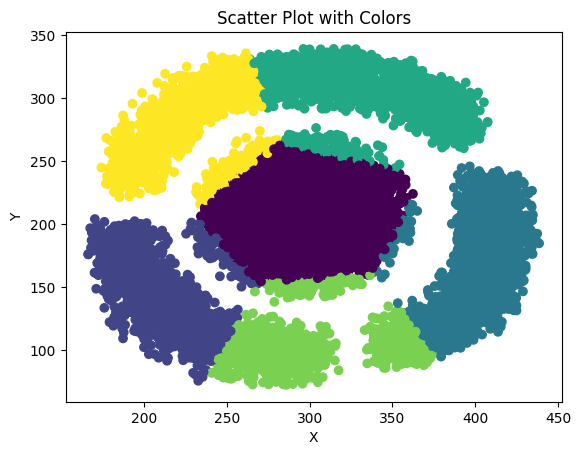

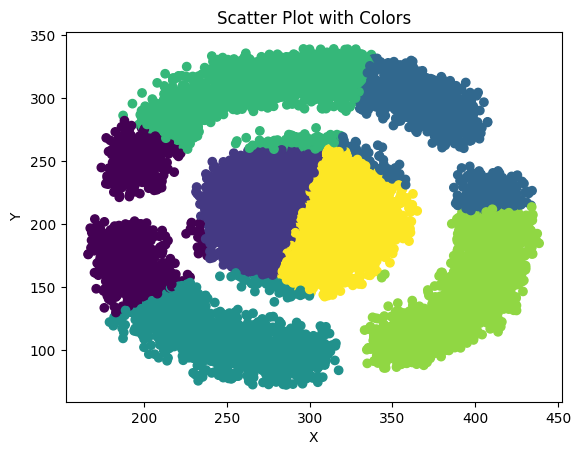

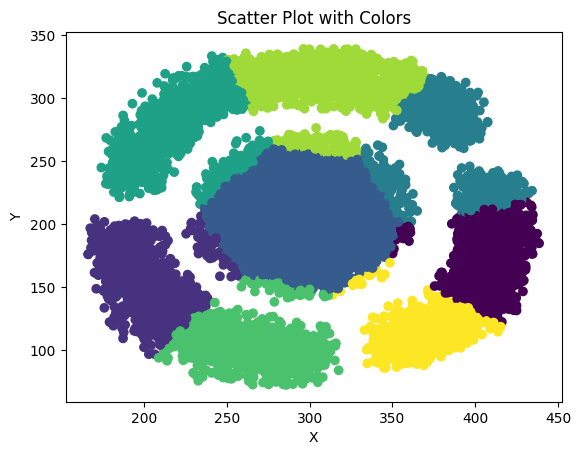

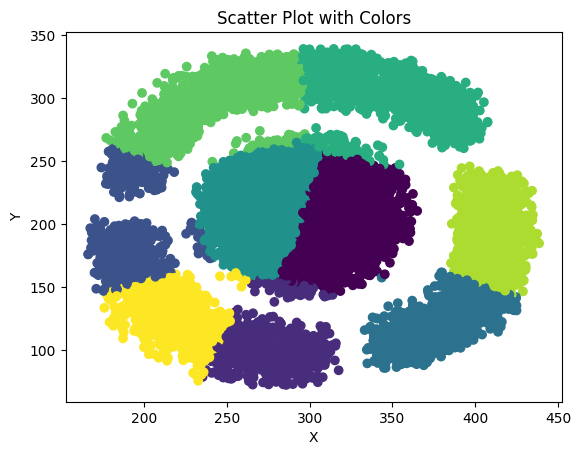

In [ ]:
for i in range(1,10):      
      labels=k_means_clustering(df3,i)
     # labels
      # Load data from a CSV file
      data2 = df3
      data2['color']=labels
      # Extract x, y, and color columns from the data
      x = data2['x']
      y = data2['y']
      colors = data2['color']

      #Plot the points with their colors
      plt.scatter(x, y, c=colors)
      # Set axis labels and title
      plt.xlabel('X')
      plt.ylabel('Y')
      plt.title('Scatter Plot with Colors')

      # Show the plot
      plt.show()

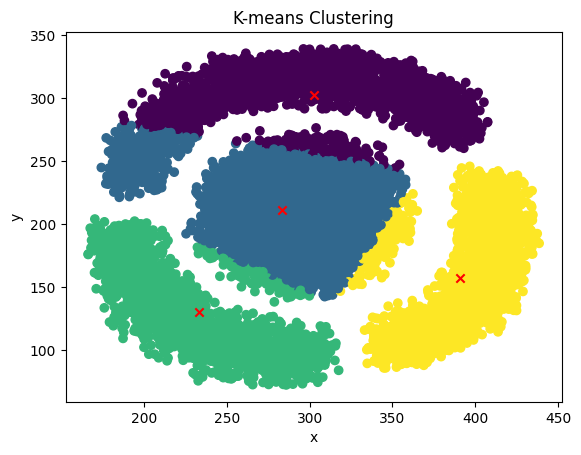

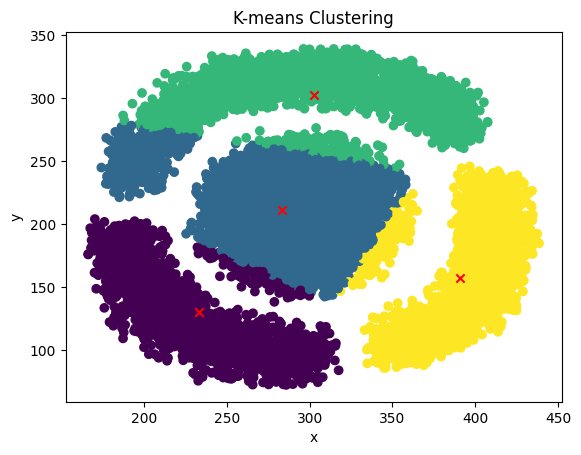

In [ ]:
# Create a sample dataset
data = np.array(df3)

# Define the number of clusters (k) and maximum iterations
k =4
max_iterations = 100

# Perform k-means clustering
centroids, clusters = kmeans(data, k, max_iterations)

# Plot the points and cluster centers
plt.scatter(data[:, 0], data[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('K-means Clustering')
plt.show()


# Perform k-means clustering
centroids, clusters = kmeans(data, k, max_iterations)

# Plot the points and cluster centers
plt.scatter(data[:, 0], data[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('K-means Clustering')
plt.show()